# Prepare Exercises

### The end result of this exercise should be a file named prepare.py.

## Using your store items data:

- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [7]:
# imports
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data, duetschland_macht

In [23]:
# getting the store data from my stored .csv
df = pd.read_csv('complete_store_data.csv')

In [24]:
df.head() # check_yo_head

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [25]:
# dropping columns that are not needed
df = df.drop(columns=['item', 'store'])

In [26]:
# Convert date column to datetime format.
df.sale_date = pd.to_datetime(df.sale_date)

In [27]:
# this one uses a lamba function to remove all the stuff after the sale_date
# df_store.sale_date = pd.to_datetime(df_store.sale_date.apply(lambda x: x[:-13]))

In [28]:
df.head() # check_yo_head

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode
0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,2013-01-01 00:00:00+00:00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,11.0,2013-01-02 00:00:00+00:00,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,14.0,2013-01-03 00:00:00+00:00,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,2013-01-04 00:00:00+00:00,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.0,2013-01-05 00:00:00+00:00,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


<AxesSubplot:xlabel='sale_amount'>

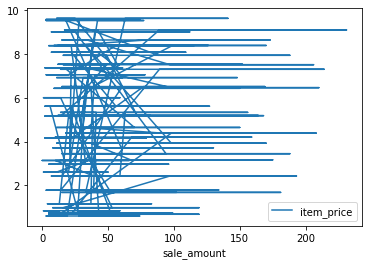

In [29]:
# Plot the distribution of sale_amount and item_price.
df.plot(x='sale_amount', y='item_price')

Text(0, 0.5, 'Sale Amount - Items Sold')

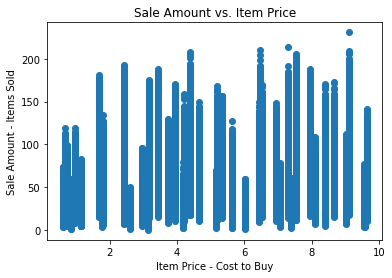

In [30]:
# scatter plot of sale amount and item price
plt.scatter(y=df.sale_amount, x=df.item_price)
plt.title('Sale Amount vs. Item Price')
plt.xlabel('Item Price - Cost to Buy')
plt.ylabel('Sale Amount - Items Sold')

<AxesSubplot:title={'center':'Distribution of Sale Amount'}, ylabel='Frequency'>

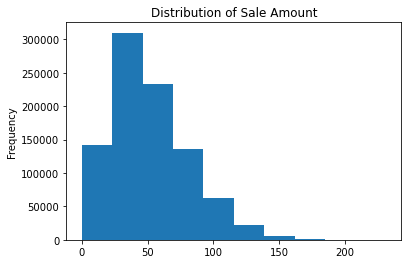

In [31]:
# histogram of distribution of 'sale_amount'
df.sale_amount.plot.hist(title='Distribution of Sale Amount')

<AxesSubplot:title={'center':'Distribution of Item Price'}, ylabel='Frequency'>

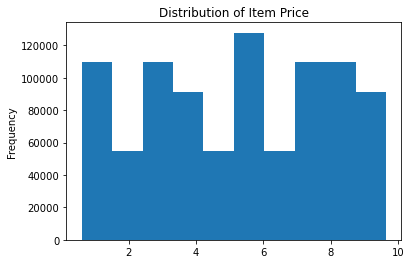

In [32]:
# histogram of distribution of 'item_price'
df.item_price.plot.hist(title='Distribution of Item Price')

In [33]:
# Set the index to be the datetime variable.
df = df.set_index(['sale_date']).sort_index()

In [34]:
df.head() # check_yo_head

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,46,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232
2013-01-01 00:00:00+00:00,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221


In [ ]:
# this one plots both columns at the same time
# df_store[['sale_amount', 'item_price']].hist(figsize=(20,10))

In [35]:
# Add a 'month' and 'day of week' column to your dataframe.
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [36]:
# taking a look at the new columns 
df.columns

Index(['key_0', 'item_brand', 'item_id', 'item_name', 'item_price',
       'item_upc12', 'item_upc14', 'sale_amount', 'sale_id', 'store_address',
       'store_city', 'store_id', 'store_state', 'store_zipcode', 'month',
       'day_of_week'],
      dtype='object')

In [37]:
# looking at month column to verify it shows the month_name
df.month

sale_date
2013-01-01 00:00:00+00:00     January
2013-01-01 00:00:00+00:00     January
2013-01-01 00:00:00+00:00     January
2013-01-01 00:00:00+00:00     January
2013-01-01 00:00:00+00:00     January
                               ...   
2017-12-31 00:00:00+00:00    December
2017-12-31 00:00:00+00:00    December
2017-12-31 00:00:00+00:00    December
2017-12-31 00:00:00+00:00    December
2017-12-31 00:00:00+00:00    December
Name: month, Length: 913000, dtype: object

In [38]:
# looking at day_of_week column to verify it shows day_name
df.day_of_week

sale_date
2013-01-01 00:00:00+00:00    Tuesday
2013-01-01 00:00:00+00:00    Tuesday
2013-01-01 00:00:00+00:00    Tuesday
2013-01-01 00:00:00+00:00    Tuesday
2013-01-01 00:00:00+00:00    Tuesday
                              ...   
2017-12-31 00:00:00+00:00     Sunday
2017-12-31 00:00:00+00:00     Sunday
2017-12-31 00:00:00+00:00     Sunday
2017-12-31 00:00:00+00:00     Sunday
2017-12-31 00:00:00+00:00     Sunday
Name: day_of_week, Length: 913000, dtype: object

In [39]:
df.head()

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday
2013-01-01 00:00:00+00:00,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday
2013-01-01 00:00:00+00:00,46,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday
2013-01-01 00:00:00+00:00,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,January,Tuesday
2013-01-01 00:00:00+00:00,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,January,Tuesday


In [40]:
# Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
df['sales_total'] = df.sale_amount * df.item_price

In [41]:
df.head() # check_yo_head

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,January,Tuesday,294.00


### Make sure all the work that you have done above is reproducible. 
### That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

# Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [9]:
# getting the german power data
ops_df = duetschland_macht()

In [10]:
ops_df.head() # check_yo_head

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [11]:
# Convert date column to datetime format.
ops_df.Date = pd.to_datetime(ops_df.Date)

In [12]:
ops_df.head() # check_yo_head

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [13]:
import seaborn as sns

In [ ]:
# Plot the distribution of each of your variables.
sns.pairplot(ops_df)

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Consumption'}>],
       [<AxesSubplot:title={'center':'Wind'}>,
        <AxesSubplot:title={'center':'Solar'}>],
       [<AxesSubplot:title={'center':'Wind+Solar'}>, <AxesSubplot:>]],
      dtype=object)

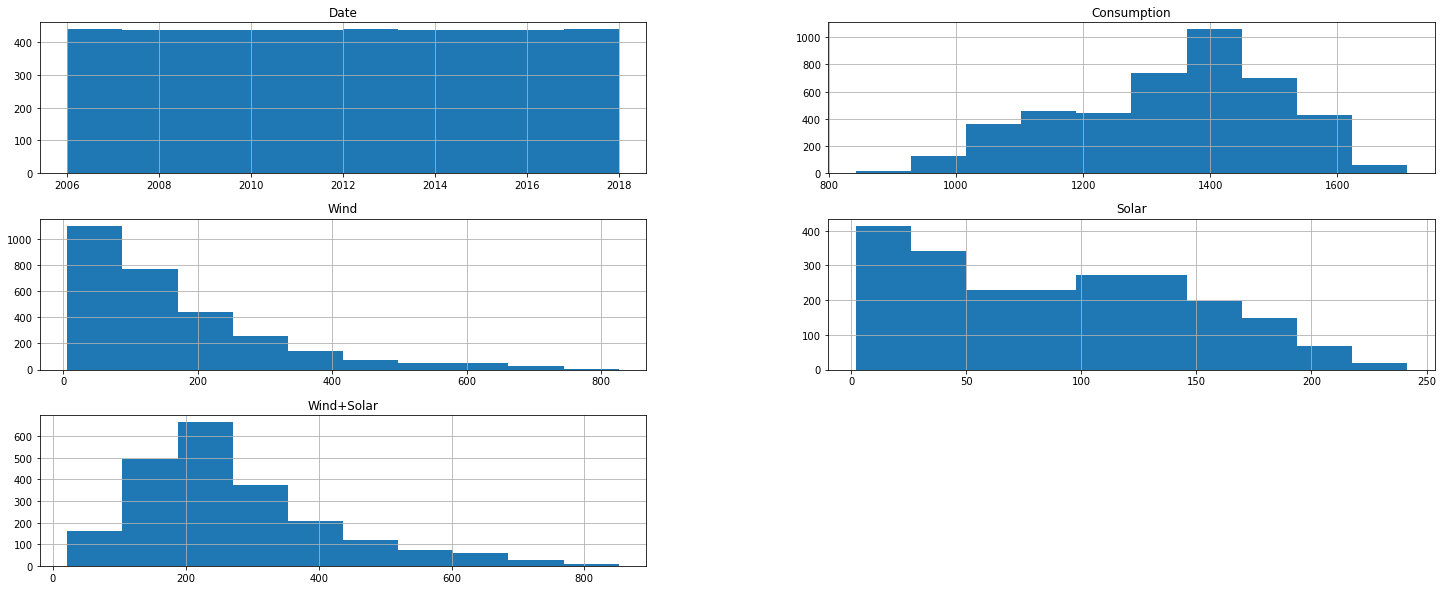

In [14]:
ops_df.hist(figsize=(25,10))

<AxesSubplot:>

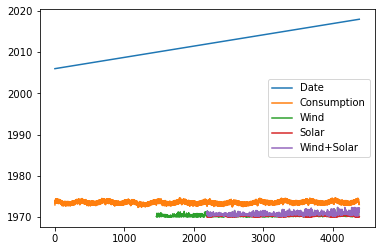

In [15]:
# dropping a .plot on the data
ops_df.plot()

In [16]:
# Set the index to be the datetime variable.
ops_df = ops_df.set_index("Date").sort_index()

array([[<AxesSubplot:title={'center':'Consumption'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Solar'}>,
        <AxesSubplot:title={'center':'Wind+Solar'}>]], dtype=object)

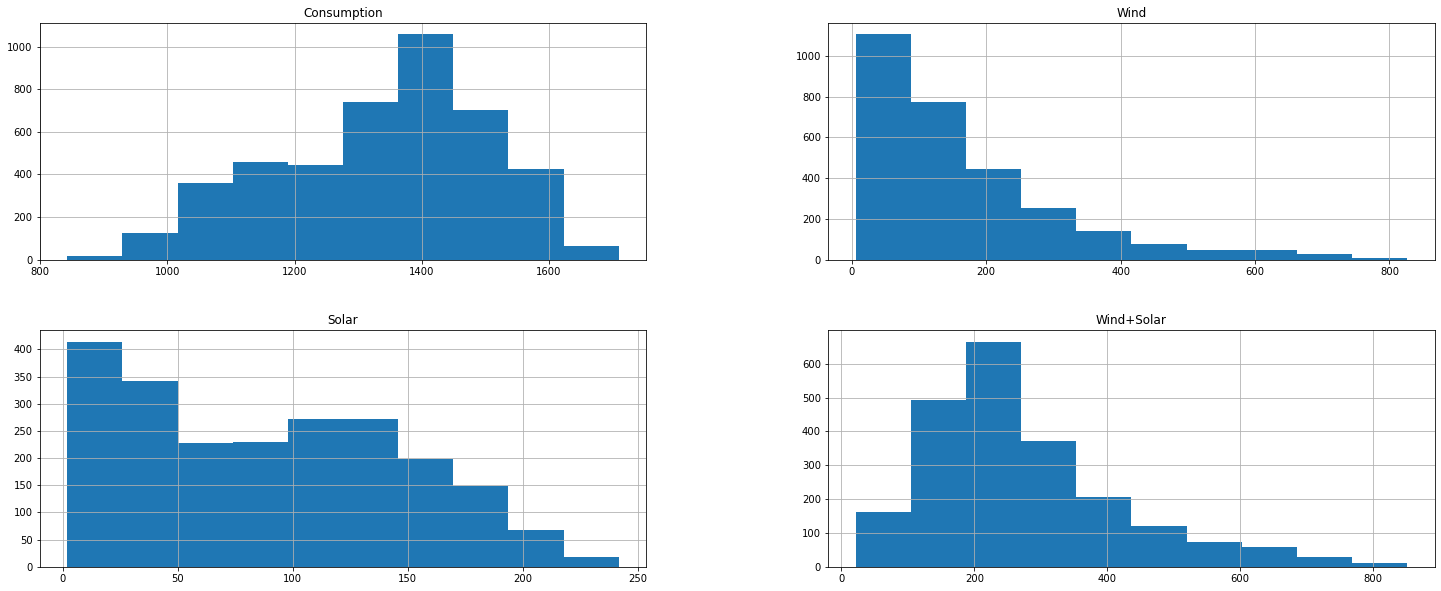

In [17]:
ops_df.hist(figsize=(25,10))

In [18]:
# Add a month and a year column to your dataframe.
ops_df['month'] = ops_df.index.month
ops_df['year'] = ops_df.index.year

In [19]:
ops_df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


In [20]:
# Fill any missing values.
ops_df.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [21]:
## Fill any missing values.
ops_df = ops_df.fillna(0)

In [22]:
ops_df.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

In [42]:
ops_df.head() # check_yo_head

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


## Make sure all the work that you have done above is reproducible. 
## That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
# df[df['Wind+Solar'] != (df['Wind'] + df['Solar'])]
# df['wind_solar_custm'] = df['Wind'] + df['Solar']
# df[df['Wind+Solar'] != (df['Wind'] + df['Solar'])][['Wind', 'Solar', 'Wind+Solar', 'wind_solar_custm']]